C:\Users\prana\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


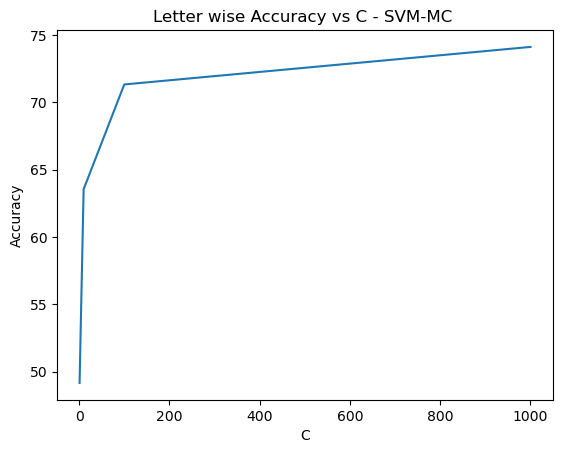

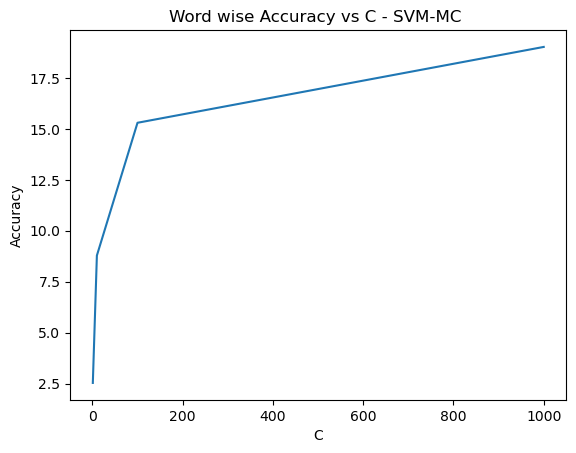

In [3]:
from readInput import read_train_struct,read_test_struct,read_word_indexes
from sklearn.svm import LinearSVC
import matplotlib.pyplot as mp
import numpy as np

def train(xtrain,y_train,c):    
    clf = LinearSVC(random_state=0,C=c)
    clf.fit(xtrain,y_train)
    return clf

def test(model,X_test,y_test):
    y_pred=model.predict(X_test)
    score=(model.score(X_test,y_test))
    return y_test,y_pred,score

def form_words(y1,y2):
    word_ends=[]
    word_idx=read_word_indexes()
    word_ends=np.insert(np.where(word_idx==-1),0,0)
    given_words=[]
    pred_words=[] 
    start=0
    for i in range(len(word_ends)-1):   
        end=word_ends[i+1]+1
        g_word=y1[start:end]
        p_word=y2[start:end]
        g_word = [ i[0] for i in g_word ]
        start=end
        given_words.append(g_word)
        pred_words.append(p_word)
    return given_words, pred_words    
    
def word_accuracy(words1,words2):
    count=0
    for i,j in zip(words1,words2):
        if(np.array_equal(i,j)):
            count+=1
    return count/len(words1)
    
def plot():
    C=[1,10,100,1000]
    test_accuracy =[]
    word_acr =[]
    X_train ,y_train=read_train_struct();
    X_test,y_test=read_test_struct()

    for i in C : 
        y_train=y_train.ravel()
        clf=train(X_train,y_train,i/len(y_train))
        y_test,y_pred,score=test(clf,X_test,y_test)
        test_accuracy.append(score*100)
        y_train=y_train.reshape(len(y_train,))
        given_words, pred_words=form_words(y_test,y_pred)
        w_acc=word_accuracy(given_words,pred_words)
        word_acr.append(w_acc*100)
        
    mp.figure(1)
    mp.plot(C,test_accuracy)
    mp.ylabel('Accuracy')
    mp.xlabel('C')
    mp.title('Letter wise Accuracy vs C - SVM-MC ')
    mp.figure(2)
    mp.figure
    mp.plot(C,word_acr)
    mp.ylabel('Accuracy')
    mp.xlabel('C')
    mp.title('Word wise Accuracy vs C - SVM-MC ')

    
plot()
    

# SVM-MC

In [48]:
import os.path
import numpy as np

my_path = os.path.abspath(os.path.dirname("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/"))
path = os.path.join(my_path, "data/decode_input.txt")
path1 = os.path.join(my_path, "data/train_struct.txt")
path2 = os.path.join(my_path, "data/train.txt")


def read_parameters():
    print("Reading parameters from:", path)
    if not os.path.exists(path):
        print("Error: File not found at path:", path)
        return None
    
    raw_data = np.loadtxt(path, ndmin=1)
    x = np.array(raw_data[0:100*128]).reshape(100, 128)
    w = np.array(raw_data[100*128:100*128+26*128]).reshape(26, 128)
    t = np.array(raw_data[100*128+26*128:]).reshape(26, 26)
    return x, w, t


def read_word_indexes():
    print("Reading word indexes from:", path2)
    if not os.path.exists(path2):
        print("Error: File not found at path:", path2)
        return None
    
    raw_data = np.loadtxt(path2, usecols=(2,))
    return raw_data


def read_train_struct():
    print("Reading training structure from:", path1)
    if not os.path.exists(path1):
        print("Error: File not found at path:", path1)
        return None, None
    
    with open(path1, "r") as f:
        raw_data = f.read()
    raw_data = raw_data.split("\n")

    dataX, dataY = [], []
    for line in raw_data[:-1]:  # -2 because last element is empty
        line = line.split(" ")
        dataY.append([int(line[0])])
        datax = [0]*128
        for f1 in line[2:]:
            end = f1.find(":")
            datax[int(f1[:end])-1] = 1
        dataX.append(datax)

    return np.array(dataX, dtype=float), np.array(dataY, dtype=int)

def read_test_struct():
    print("Reading test structure from:", path1)
    if not os.path.exists(path1):
        print("Error: File not found at path:", path1)
        return None, None
    
    with open(path1, "r") as f:
        raw_data = f.read()
    raw_data = raw_data.split("\n")

    dataX, dataY = [], []
    for line in raw_data[:-1]:  # -2 because last element is empty
        #print("Line:", line)  # Print the line for debugging
        line = line.split(" ")
        dataY.append([int(line[0])])
        datax = [0]*128
        for f1 in line[2:]:
            end = f1.find(":")
            #print("Feature:", f1[:end])  # Print the feature for debugging
            datax[int(f1[:end])-1] = 1
        dataX.append(datax)

    return np.array(dataX, dtype=float), np.array(dataY, dtype=int)



# Debugging and verification
x, w, t = read_parameters()
print("Parameters x shape:", x.shape)
print("Parameters w shape:", w.shape)
print("Parameters t shape:", t.shape)

word_indexes = read_word_indexes()
print("Word indexes:", word_indexes)

train_dataX, train_dataY = read_train_struct()
print("Training dataX shape:", train_dataX.shape)
print("Training dataY shape:", train_dataY.shape)

test_dataX, test_dataY = read_test_struct()
print("Test dataX shape:", test_dataX.shape)
print("Test dataY shape:", test_dataY.shape)


Reading parameters from: C:\Users\prana\Desktop\Fall 23\Adv ML\LAB1\CRF-master\data/decode_input.txt
Parameters x shape: (100, 128)
Parameters w shape: (26, 128)
Parameters t shape: (26, 26)
Reading word indexes from: C:\Users\prana\Desktop\Fall 23\Adv ML\LAB1\CRF-master\data/train.txt
Word indexes: [ 2.  3. -1. ...  8.  9. -1.]
Reading training structure from: C:\Users\prana\Desktop\Fall 23\Adv ML\LAB1\CRF-master\data/train_struct.txt
Training dataX shape: (25953, 128)
Training dataY shape: (25953, 1)
Reading test structure from: C:\Users\prana\Desktop\Fall 23\Adv ML\LAB1\CRF-master\data/train_struct.txt
Test dataX shape: (25953, 128)
Test dataY shape: (25953, 1)


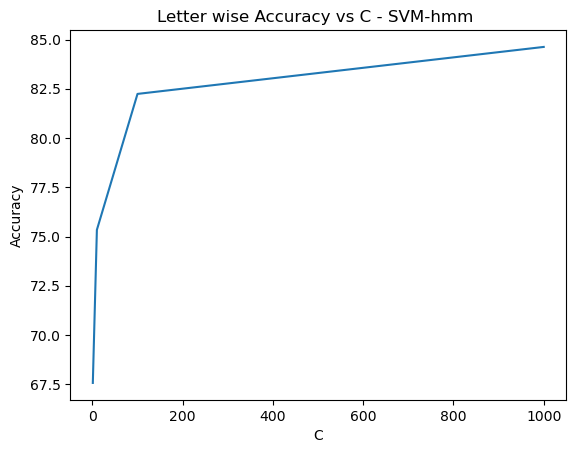

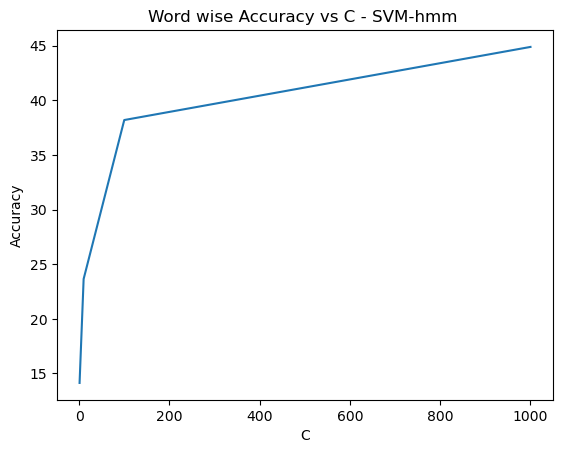

In [2]:


import subprocess
from readInput import read_train_struct,read_test_struct,read_word_indexes
import numpy as np
import os.path
import matplotlib.pyplot as mp

def train(c):    
#   output = subprocess.getoutput('svm_hmm_learn -c 1 train_struct.txt declaration.model')
    subprocess.call(["svm_hmm_learn", "-c", str(c), "train_struct.txt", "declaration.model"])

def test():
#    output = subprocess.getoutput('svm_hmm_classify test_struct.txt declaration.model test.outtags ')
    subprocess.call(["svm_hmm_classify", "test_struct.txt", "declaration.model","test.outtags"])

def form_words(y1,y2):
    word_ends=[]
    word_idx=read_word_indexes()
    word_ends=np.insert(np.where(word_idx==-1),0,0)
    given_words=[]
    pred_words=[] 
    start=0
    for i in range(len(word_ends)-1):   
        end=word_ends[i+1]+1
        g_word=y1[start:end]
        p_word=y2[start:end]
        start=end
        given_words.append(g_word)
        pred_words.append(p_word)
    return given_words, pred_words    
    
def word_accuracy(words1,words2):
    count=0
    for i,j in zip(words1,words2):
        if(np.array_equal(i,j)):
            count+=1
    return count/len(words1)
    
def get_test_accuracy(y1,y2):
    count=0
    for i,j in zip(y1,y2):
        if(np.array_equal(i,j)):
            count+=1
    return count/len(y1)

    
def plot():
    C=[1,10, 100 , 1000]
    test_accuracy =[]
    word_acr =[]
    X_train ,y_train=read_train_struct();
    X_test,y_test=read_test_struct()
    for i in C : 
        train(i)
        test()
        my_path = os.path.abspath(os.path.dirname("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/ashwani/"))
        path = os.path.join(my_path, "test.outtags")
        y_pred=np.loadtxt(path,usecols=(0,))
        y_test=y_test.reshape(len(y_test),)
        test_acc=get_test_accuracy(y_test,y_pred)
        test_accuracy.append(test_acc*100)
        given_words, pred_words=form_words(y_test,y_pred)
        w_acc=word_accuracy(given_words,pred_words)
        word_acr.append(w_acc*100)
        
    mp.figure(1)
    mp.plot(C,test_accuracy)
    mp.ylabel('Accuracy')
    mp.xlabel('C')
    mp.title('Letter wise Accuracy vs C - SVM-hmm ')
    mp.figure(2)
    mp.plot(C,word_acr)
    mp.ylabel('Accuracy')
    mp.title('Word wise Accuracy vs C - SVM-hmm ')
    mp.xlabel('C')
    
plot()

#SVM-hmm

Let's begin with the first part, which involves implementing the SVM-Struct model using the off-the-shelf SVMhmm package for structured prediction. Since no Matlab/Python wrapper is available for SVMhmm, we will create a Python script that interfaces with the SVMhmm binary. This script will run the SVMhmm binary with the specified parameters and datasets, then parse the output to evaluate the letter-wise and word-wise prediction accuracy on the test data.

### Here is a high-level outline of the Python code for SVM-Struct:

Define the path to the SVMhmm executable and the data files.

Define a function to execute SVMhmm with given parameters.

Define a function to parse the output of SVMhmm and calculate letter-wise and word-wise accuracies.

Iterate over a range of -c values, run SVMhmm, and collect accuracies.

Plot the accuracy curves for both letter-wise and word-wise predictions

In [5]:
def read_decode_input():
#function to read the data from decode_input
#100 letters each 128 elements
#26 weight vectors each 128 elements
#T which is a 26 x 26 weight matrix
#T is row major T_11, T_21, T_31 ..

	with open("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/data/decode_input.txt", "r") as f:
		raw_data = f.read().split("\n")

	X = numpy.array(raw_data[:100*128], dtype=float).reshape(100,128)
	W = numpy.array(raw_data[100*128:100*128+26*128]\
		, dtype=float).reshape(26,128)
	T = numpy.array(raw_data[100*128+26*128:-1], dtype=float).reshape(26,26)
	T = numpy.swapaxes(T, 0, 1)

	return X, W, T


In [10]:
import numpy 
import decode
from readInput import read_word_indexes,read_test_struct
import matplotlib.pyplot as mp
import data_read
from string import ascii_lowercase

X, W, T = read_decode_input()
#
y_star = decode.max_sum(X, W, T)
#
#from string import ascii_lowercase
mapping = dict(enumerate(ascii_lowercase))
#
for i in range(y_star.shape[0]):
    print(mapping[y_star[i]])

def word_accuracy(words1,words2):
    count=0
    for i,j in zip(words1,words2):
        if(numpy.array_equal(i,j)):
            count+=1
    return count/len(words1)
    
def get_test_accuracy(y1,y2):
    count=0
    for i,j in zip(y1,y2):
        if(numpy.array_equal(i,j)):
            count+=1
    return count/len(y1)

def form_words(y1,y2):
    word_ends=[]
    word_idx=read_word_indexes()
    word_ends=numpy.insert(numpy.where(word_idx==-1),0,0)
    given_words=[]
    pred_words=[] 
    start=0
    for i in range(len(word_ends)-1):   
        end=word_ends[i+1]+1
        g_word=y1[start:end]
        p_word=y2[start:end]
        start=end
        given_words.append(g_word)
        pred_words.append(p_word)
    return given_words, pred_words 

# Check the decoder with the parameter calculated in 2(b)
def test_params(filepath):
    X_test,y_test=read_test_struct()
    y_pred=[]
    a=numpy.loadtxt(filepath, usecols=(0,))
    #a1=numpy.loadtxt("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c1",usecols=(0,))
    #a2=numpy.loadtxt("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c10",usecols=(0,))
    #a3=numpy.loadtxt("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c100",usecols=(0,))
    W=numpy.array(a[:26*128].reshape(26,128))
    T=numpy.array(a[26*128:26*128+26*26].reshape(26,26))
    y_pred = decode.max_sum(X_test, W, T)
    y_pred=[y+1 for y in y_pred]
    y_test=y_test.reshape(26198,)
    numpy.savetxt("prediction",y_pred)
    #print(y_pred)
    #print(y_test)
    test_acc=get_test_accuracy(y_test,y_pred)
    test_accuracy=(test_acc*100)
    print("Test letter wise accuracy=",test_accuracy)
    y_test=y_test.reshape(len(y_test,))
    given_words, pred_words=form_words(y_test,y_pred)
    w_acc=word_accuracy(given_words,pred_words)
    word_acr =(w_acc*100)
    print("Test word accuracy=",word_acr)
    return word_acr, test_accuracy


w1, t1 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c1")
w2, t2 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c10")
w3, t3 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c100")
w4, t4 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/data/best_params")
w5, t5 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c250")
w6, t6 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c500")
w7, t7 = test_params("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/code/best_Weights_c750")


200.33257896998458
r
k
v
q
s
o
j
v
w
t
k
k
t
g
d
n
g
d
q
i
e
f
g
f
u
f
t
u
z
v
d
z
k
m
m
r
a
p
e
u
s
i
e
e
e
k
z
j
i
x
d
m
l
o
m
j
d
w
k
k
a
p
x
n
o
z
w
h
k
b
h
n
n
c
l
a
h
t
c
h
t
j
p
t
f
e
l
h
e
x
q
o
h
r
a
k
q
p
f
w
40528.18124088519
Test letter wise accuracy= 44.7515077486831
Test word accuracy= 1.7452006980802792
74095.58823165686
Test letter wise accuracy= 63.084968318192225
Test word accuracy= 9.889470622454915
108518.30369187937
Test letter wise accuracy= 61.66501259638141
Test word accuracy= 10.325770796974986
207798.11997835047
Test letter wise accuracy= 80.25040079395373
Test word accuracy= 34.75858057009889
110400.49625963948
Test letter wise accuracy= 62.23757538743415
Test word accuracy= 10.616637579988366
111049.73606881633
Test letter wise accuracy= 62.443697992213146
Test word accuracy= 10.70389761489238
111268.42041794349
Test letter wise accuracy= 62.51240552713948
Test word accuracy= 10.878417684700407


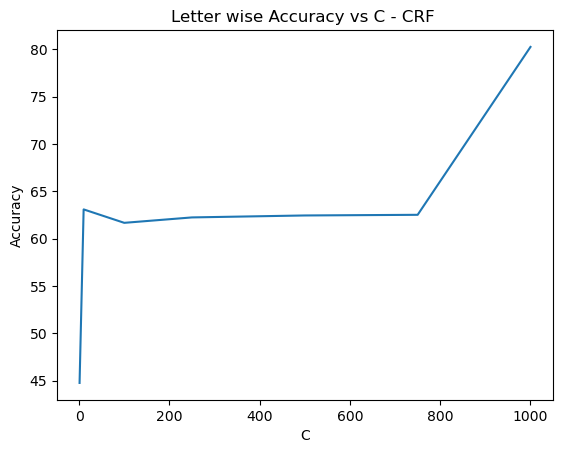

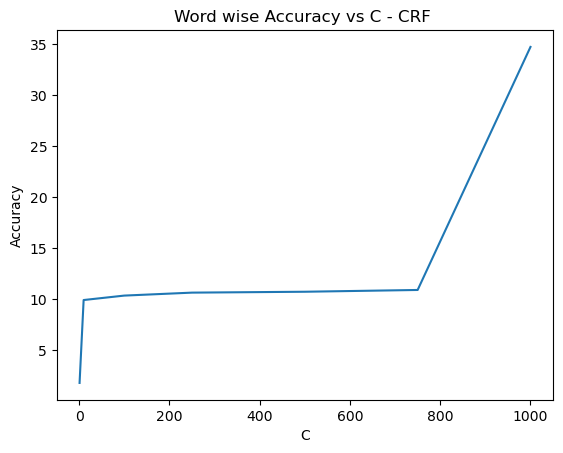

In [11]:
#Test letter wise accuracy= 80.25040079395373
#Test word accuracy= 34.75858057009889

def plot():
    C=[1,10,100,250,500,750,1000]
    #test_accuracy=[44.74,68.80,79.19,80.25]
    #word_acr=[1.80,14.89,32.78,34.75]
    test_accuracy= [t1,t2,t3,t5,t6,t7,t4]
    word_acr= [w1,w2,w3,w5,w6,w7,w4]
    mp.figure(1)
    mp.plot(C,test_accuracy)
    mp.title('Letter wise Accuracy vs C - CRF ')
    mp.ylabel('Accuracy')
    mp.xlabel('C')
    mp.figure(2)
    mp.plot(C,word_acr)
    mp.ylabel('Accuracy')
    mp.xlabel('C')  
    mp.title('Word wise Accuracy vs C - CRF ')

plot()